In [6]:
pip install bs4


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install requests

Defaulting to user installation because normal site-packages is not writeable
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
     |████████████████████████████████| 120 kB 13.1 MB/s eta 0:00:01
     |████████████████████████████████| 104 kB 94.2 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 1.5 MB/s  eta 0:00:01
     |████████████████████████████████| 162 kB 84.6 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install 

In [1]:
from bs4 import BeautifulSoup
import requests
import time
import pandas as pd


url = 'https://www.data.jma.go.jp/obd/stats/etrn/view/daily_s1.php?prec_no=44&block_no=47662&year=2023&month=12&day=1&view=a2'

r = requests.get(url)
r.raise_for_status()  # エラーの場合は例外を発生させる

# BeautifulSoupオブジェクトを作成
soup = BeautifulSoup(r.text, 'html.parser')
print(type(soup))

# 最高気温のデータを含むテーブル行を探す
# 最高気温は通常、表の第8列に位置する
rows = soup.find_all('tr', class_='mtx')

# 13日から31日の最高気温を抽出
max_temperatures = []
for row in rows[16:35]:  # 12月13日から31日までの行を選択
    cells = row.find_all('td')
    if len(cells) > 11:  # 最高気温のセルが存在するか確認
        max_temp = cells[11].get_text().strip()
        if max_temp and max_temp != '-':  # 空またはハイフンでない場合のみ追加
            max_temperatures.append(max_temp)

# 最高気温の値を表示
for temp in max_temperatures:
      time.sleep(1)
    #   print(temp)


import sqlite3

conn = sqlite3.connect('weather_data.db')

conn.execute('''CREATE TABLE IF NOT EXISTS temperatures (
                date TEXT,
                max_temperature REAL)''')

for idx, temp in enumerate(max_temperatures, start=13):
    # 日付のフォーマットをYYYY-MM-DDにします
    date = f'2023-12-{idx:02d}'
    conn.execute('INSERT INTO temperatures (date, max_temperature) VALUES (?, ?)',
                 (date, float(temp)))

conn.commit()
conn.close()



conn = sqlite3.connect('weather_data.db')

cursor = conn.cursor()
cursor.execute('SELECT * FROM temperatures')
rows = cursor.fetchall()

for row in rows:
    print(row)
conn.close()

<class 'bs4.BeautifulSoup'>
('2023-12-13', 15.1)
('2023-12-14', 14.1)
('2023-12-15', 20.2)
('2023-12-16', 21.1)
('2023-12-17', 17.2)
('2023-12-18', 11.5)
('2023-12-19', 10.6)
('2023-12-20', 13.5)
('2023-12-21', 13.1)
('2023-12-22', 10.1)
('2023-12-23', 10.6)
('2023-12-24', 8.8)
('2023-12-25', 12.1)
('2023-12-26', 13.2)
('2023-12-27', 12.6)
('2023-12-28', 10.8)
('2023-12-29', 13.8)
('2023-12-30', 14.4)
('2023-12-31', 12.7)
('2023-12-13', 15.1)
('2023-12-14', 14.1)
('2023-12-15', 20.2)
('2023-12-16', 21.1)
('2023-12-17', 17.2)
('2023-12-18', 11.5)
('2023-12-19', 10.6)
('2023-12-20', 13.5)
('2023-12-21', 13.1)
('2023-12-22', 10.1)
('2023-12-23', 10.6)
('2023-12-24', 8.8)
('2023-12-25', 12.1)
('2023-12-26', 13.2)
('2023-12-27', 12.6)
('2023-12-28', 10.8)
('2023-12-29', 13.8)
('2023-12-30', 14.4)
('2023-12-31', 12.7)
('2023-12-13', 15.1)
('2023-12-14', 14.1)
('2023-12-15', 20.2)
('2023-12-16', 21.1)
('2023-12-17', 17.2)
('2023-12-18', 11.5)
('2023-12-19', 10.6)
('2023-12-20', 13.5)
('2023-1

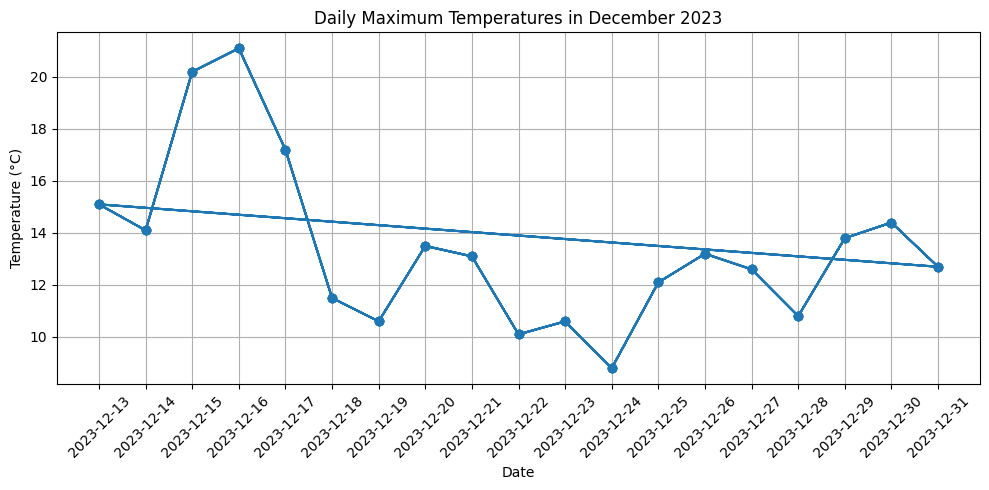

In [2]:
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# データベースからデータを読み込む
conn = sqlite3.connect('weather_data.db')
df = pd.read_sql_query('SELECT * FROM temperatures', conn)
conn.close()

# 日付データの変換（文字列から日付型へ）
df['date'] = pd.to_datetime(df['date'])

# 時系列グラフの作成
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['max_temperature'], marker='o')
plt.title('Daily Maximum Temperatures in December 2023')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)

# 日付フォーマットの設定
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.xticks(rotation=45)

# グラフの表示
plt.tight_layout()
plt.show()


In [3]:
df = pd.read_csv("/Users/furusawasaki/DSPro2/step.csv")

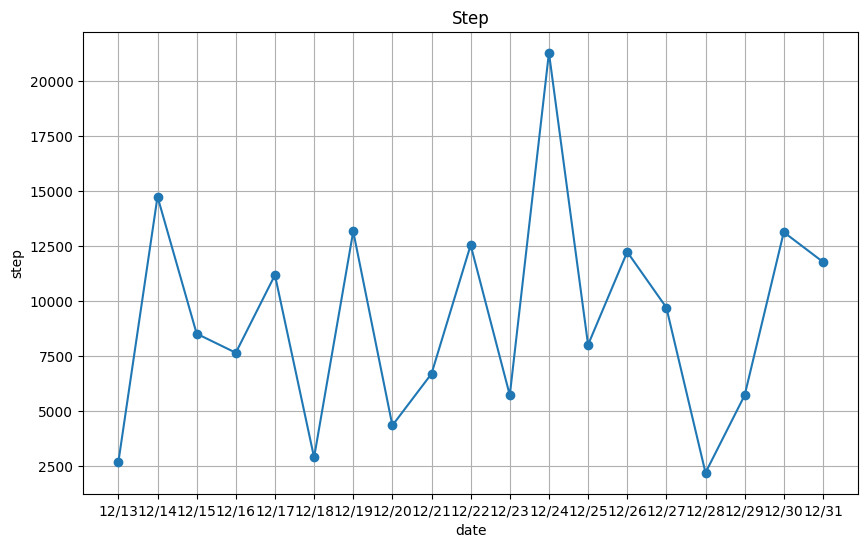

In [5]:
import matplotlib.pyplot as plt
# グラフの描画
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['step'], marker='o', linestyle='-')
plt.title('Step')
plt.xlabel('date')
plt.ylabel('step')
plt.grid(True)
plt.show()